## PyTorch Introduction 

In [13]:
import torch
import numpy as np
from torch import nn 


> How to create a Neural Network ?

In [14]:
class LineNetowrk(nn.Module):
    def __init__(self):
        super().__init__()
        # Starting the neuron
        self.layers = nn.Sequential(
            nn.Linear(1,1)
        )

    def forward(self,x): 
        return self.layers(x)
        

> How to train a Neural Network ?

> Creating a database

In [15]:
from torch.utils.data import Dataset, dataloader
import torch.distributions.uniform as urandom

class AlgebraicDataset(Dataset):
    def __init__(self, f, interval, nsamples):
        X = urandom.Uniform(interval[0], interval[1]).sample([nsamples])
        self.data = [(x,f(x)) for x in X]

    def __len__(self):
        return len(self.data) 

    def __getitem__(self,idx):
        return self.data[idx]   


> Create Training Dataset  

In [16]:
linear = lambda x: 2*x + 3  
interval = (-10, 10)
train_n_samples = 1000 
test_n_samples = 100

In [17]:
train_dataset  = AlgebraicDataset(linear,interval,train_n_samples)
test_dataset  = AlgebraicDataset(linear,interval,test_n_samples)

train_Dataloader = dataloader.DataLoader(train_dataset,batch_size=train_n_samples,shuffle=True)
test_Dataloader = dataloader.DataLoader(train_dataset,batch_size=test_n_samples,shuffle=True)

> Hyperparameter 

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Gpu is available: {device}")

Gpu is available: cuda


In [19]:
model = LineNetowrk().to(device)

In [20]:
# Loss function 
# Mean Squred error
from pickletools import optimize

lossfunc = nn.MSELoss()
# SGD = Stochastic Gradient Descent
optimize = torch.optim.SGD(model.parameters(), lr=1e-3)

> Train Model

In [21]:
def train(model,dataloader,lossfunc,optimize): 
    model.train()
    cumloss = 0.0
    for X,y in dataloader:
        # Putting the data on device 
        X = X.unsqueeze(1).float().to(device) 
        y = y.unsqueeze(1).float().to(device)

        pred = model(X)
        loss = lossfunc(pred,y)

        # Clear the gradient accumulated
        optimize.zero_grad()
        # Compute gradient
        loss.backward()
        # Walking in the gradient
        optimize.step()
        # Loss is a tensor 
        cumloss += loss.item()

    return cumloss/len(dataloader)

> Test model

In [22]:
def test(model,dataloader,lossfunc): 
    model.eval()
    cumloss = 0.0
    with torch.no_grad(): 

        for X,y in dataloader:
            # Putting the data on device 
            X = X.unsqueeze(1).float().to(device) 
            y = y.unsqueeze(1).float().to(device)

            pred = model(X)
            loss = lossfunc(pred,y)

            # Loss is a tensor 
            cumloss += loss.item()

    return cumloss/len(dataloader)

In [23]:
from matplotlib import pyplot as plt

In [27]:
def plot_comparinson(f,model, interval=(-10,10), nsamples=10): 
    fig, ax = plt.subplots(figsize=(10,10))

    ax.grid(True, which='both')
    ax.spines["left"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["bottom"].set_position("zero")
    ax.spines["top"].set_color("none")

    samples = np.linspace(interval[0], interval[1], nsamples)
    model.eval()
    with torch.no_grad():
        pred = model(torch.tensor(samples).unsqueeze(1).float().to(device))

    ax.plot(samples, list(map(f,samples)), "o", label= "ground truth")
    ax.plot(samples, pred.cpu(), label= "model")
    plt.legend()
    plt.show()

Training Network

Epoch: 0; Train Loss: 180.27899169921875


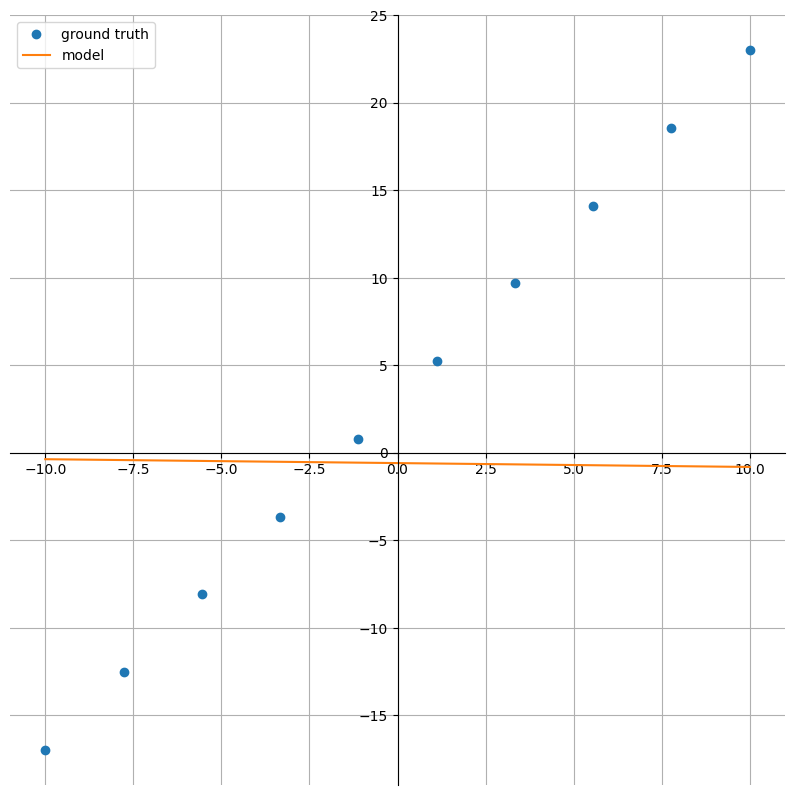

Epoch: 10; Train Loss: 52.45051956176758


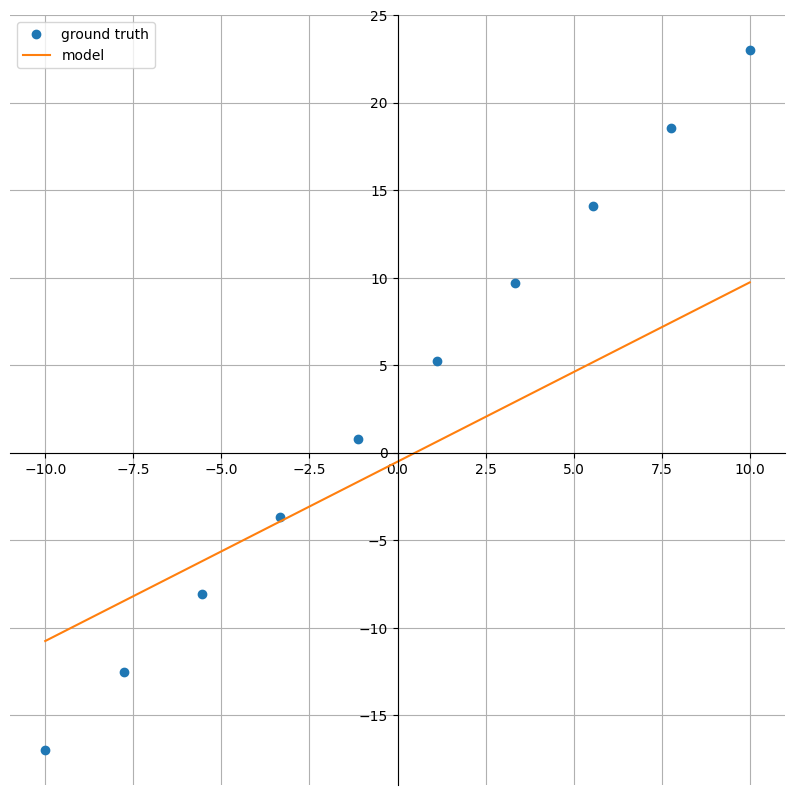

Epoch: 20; Train Loss: 21.496652603149414


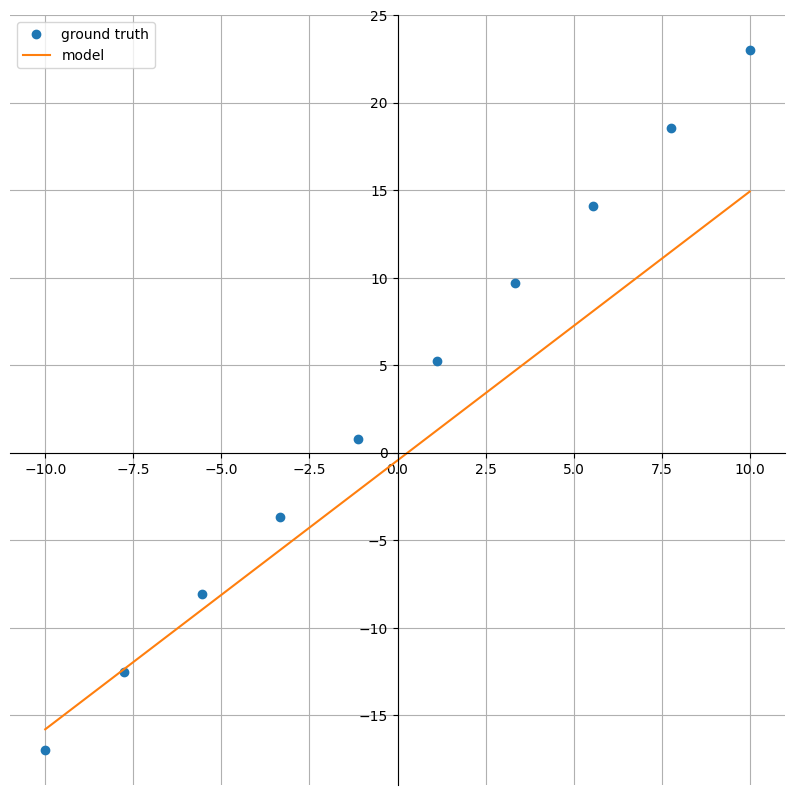

Epoch: 30; Train Loss: 13.739057540893555


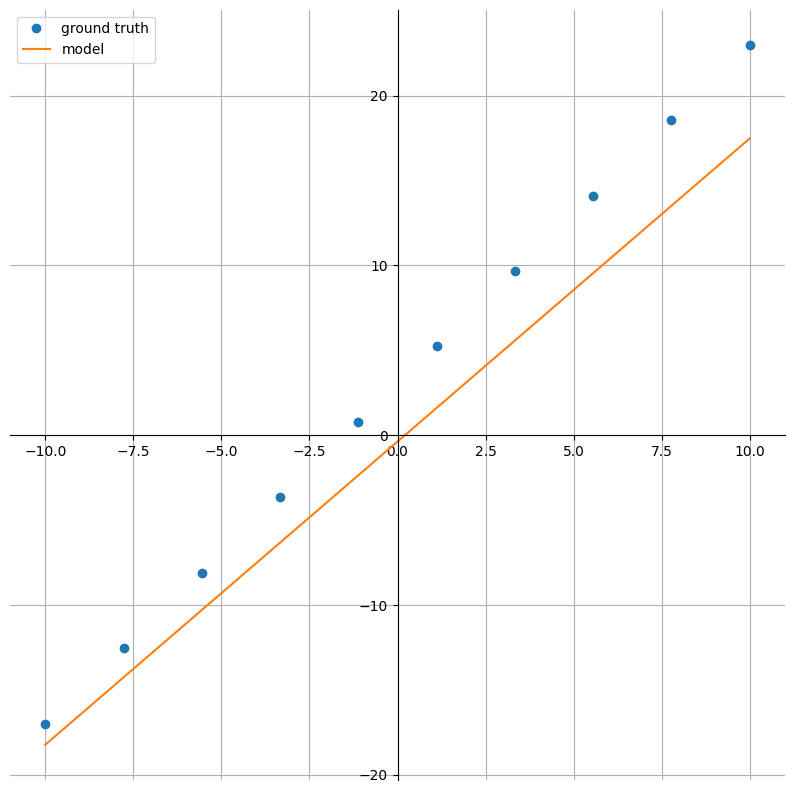

Epoch: 40; Train Loss: 11.546021461486816


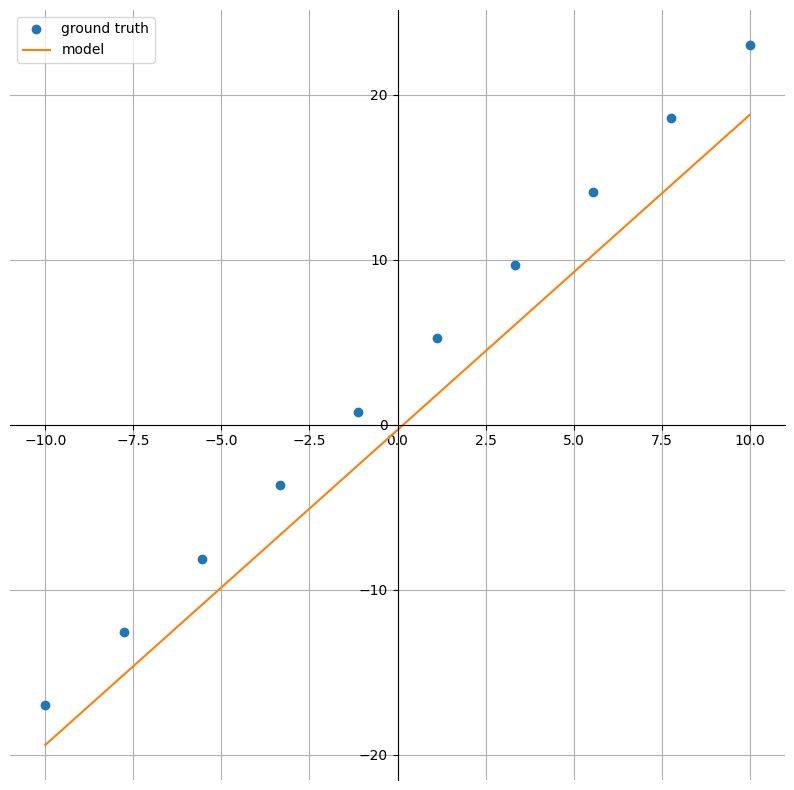

Epoch: 50; Train Loss: 10.69776439666748


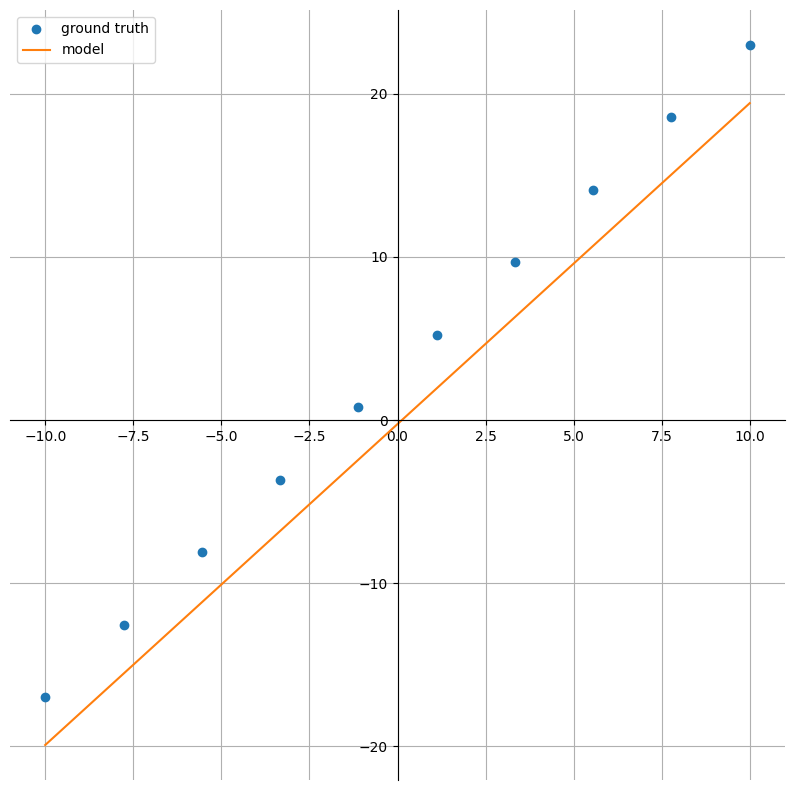

Epoch: 60; Train Loss: 10.183981895446777


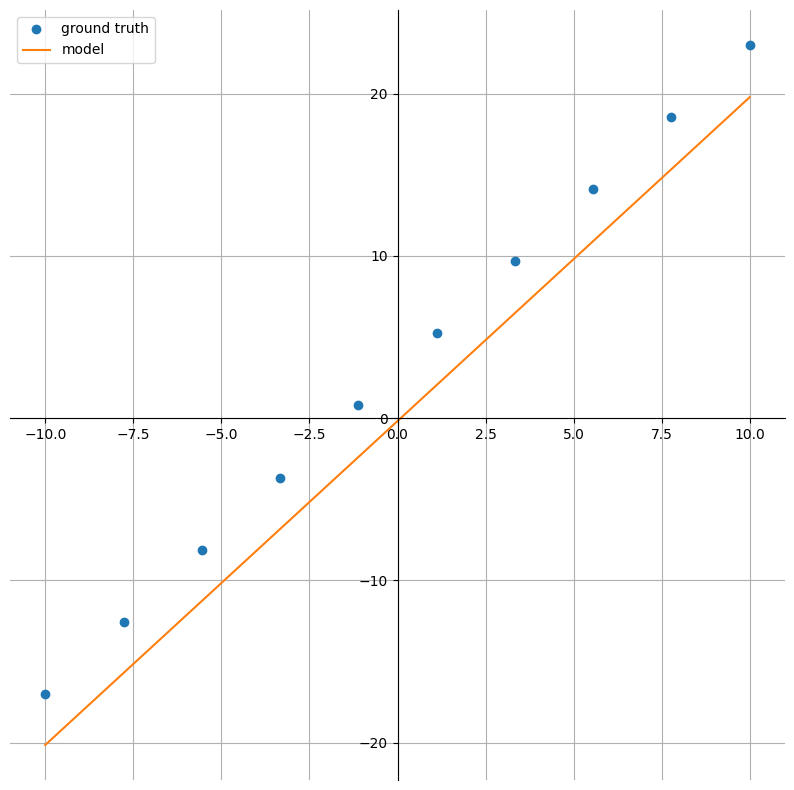

Epoch: 70; Train Loss: 9.762410163879395


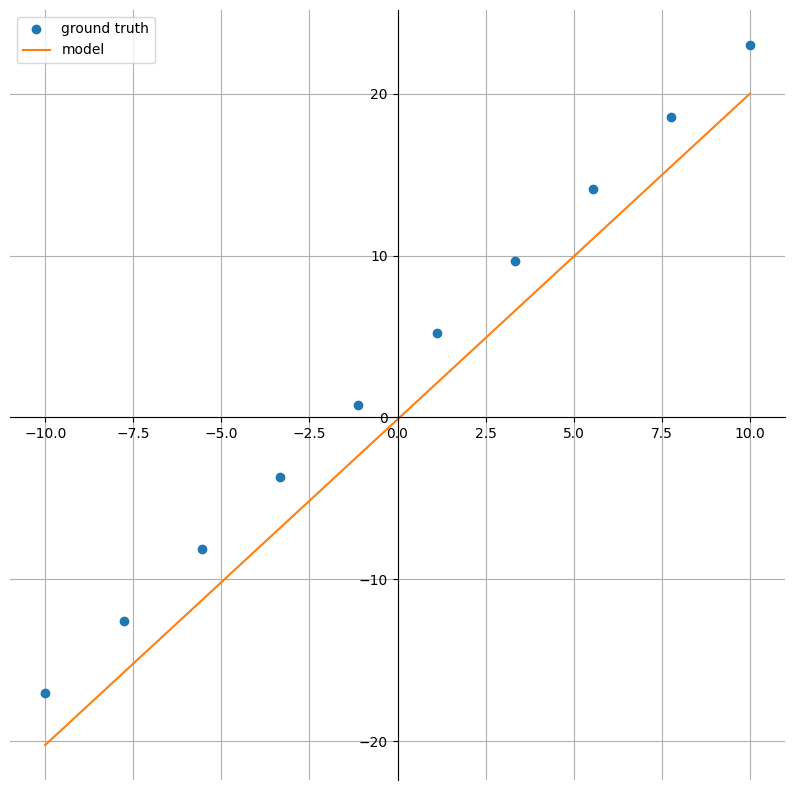

Epoch: 80; Train Loss: 9.374604225158691


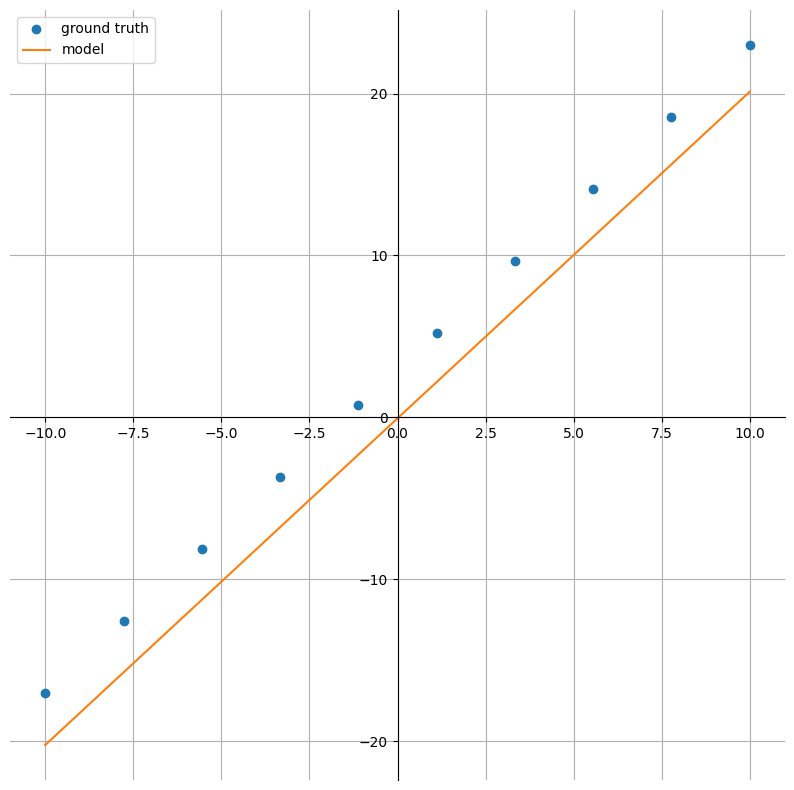

Epoch: 90; Train Loss: 9.006114959716797


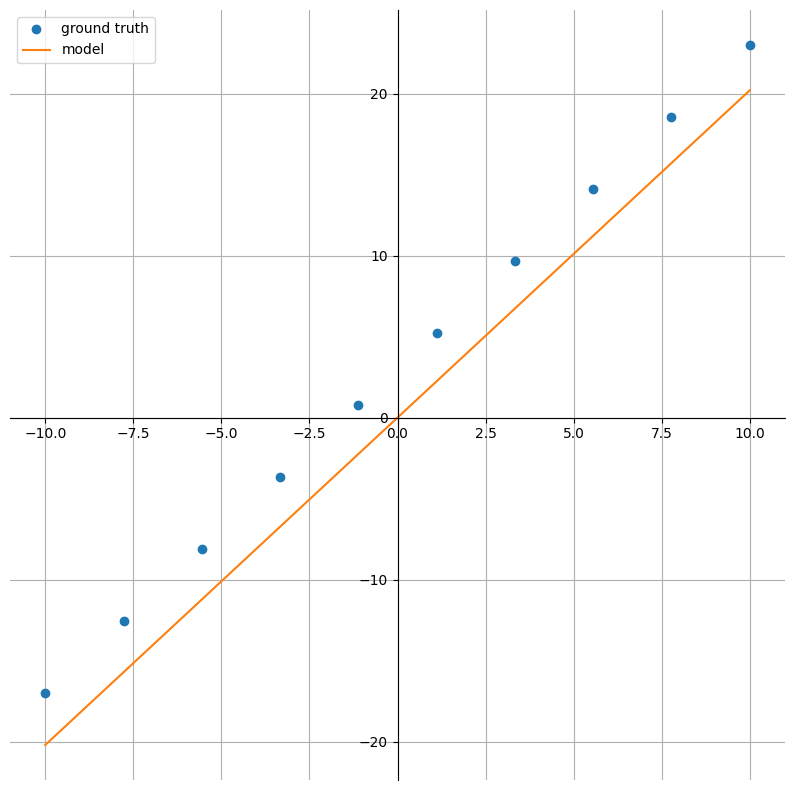

Epoch: 100; Train Loss: 8.653046607971191


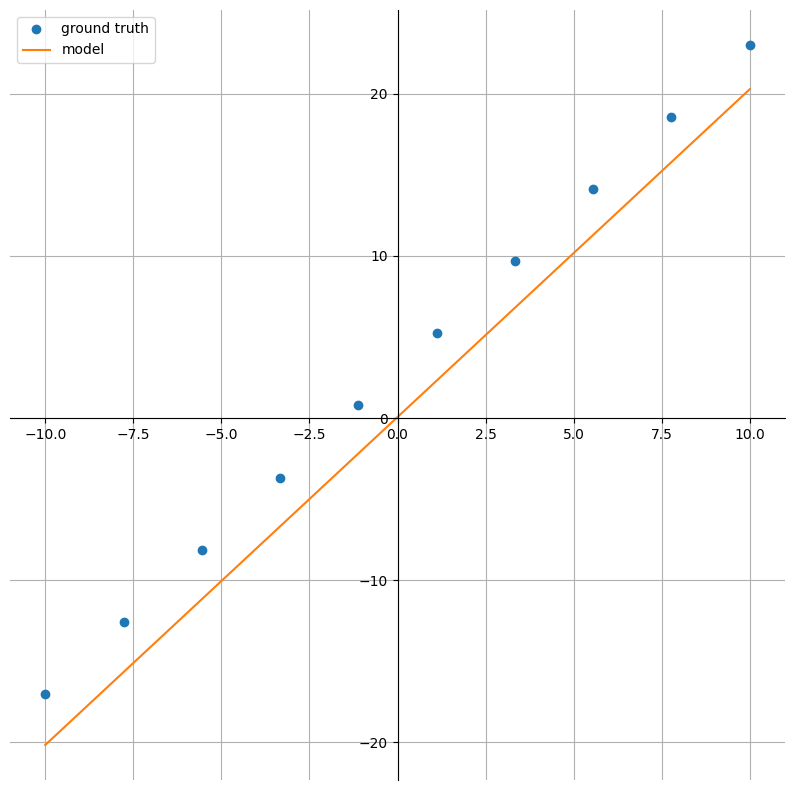

Test Loss: 8.618527030944824


In [28]:
epochs = 101

for t in range(epochs):
    train_loss = train(model, train_Dataloader, lossfunc, optimize)
    if t % 10 == 0:
        print(f"Epoch: {t}; Train Loss: {train_loss}")
        plot_comparinson(linear,model)

test_loss = test(model, test_Dataloader, lossfunc)
print(f"Test Loss: {test_loss}")